# **Data Pre-processing**

## **Import Libraries**

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_samples, silhouette_score, adjusted_rand_score, accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Rectangle, Circle, Ellipse, Polygon, Wedge, Arrow

import numpy as np
import pandas as pd
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Load Dataset**

In [4]:
# data = pd.read_csv('/content/drive/MyDrive/Dataset/Global.csv')
data = pd.read_csv('/content/drive/MyDrive/Network_Slicing_with_ML_repo/Network-Slicing-with-ML/Datasets/Global.csv')
data.head()

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,sVid,dVid,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,predicted,Label
0,34555.0,982.0,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,udp,224.0,...,610.0,NaN,NaN,NaN,0.0,0.0,0.0,144379.0,3:URLLC,Benign
1,531568.0,11362.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,udp,0.0,...,610.0,NaN,NaN,NaN,0.0,0.0,0.0,181691.0,3:URLLC,Benign
2,360399.0,70834.0,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,udp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,175580.0,3:URLLC,Benign
3,30702.0,440.0,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,udp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,120239.0,3:URLLC,Benign
4,312747.0,128397.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,udp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,348612.0,3:URLLC,Benign


In [5]:
data_backup = data
data_backup

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,sVid,dVid,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,predicted,Label
0,34555.000000,982.000000,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,udp,224.0,...,610.0,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.443790e+05,3:URLLC,Benign
1,531568.000000,11362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,udp,0.0,...,610.0,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.816910e+05,3:URLLC,Benign
2,360399.000000,70834.000000,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,udp,0.0,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.755800e+05,3:URLLC,Benign
3,30702.000000,440.000000,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,udp,0.0,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.202390e+05,3:URLLC,Benign
4,312747.000000,128397.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,udp,0.0,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,3.486120e+05,3:URLLC,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,455292.377185,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,tcp,0.0,...,NaN,NaN,1.202037e+09,148517648.0,0.595314,0.723920,0.032170,2.373585e+06,2:mMTC,Malicious
14452,455262.025767,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,tcp,0.0,...,NaN,NaN,1.202037e+09,148517648.0,0.652207,0.874332,0.028468,2.367298e+06,2:mMTC,Malicious
14453,455286.246951,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,tcp,0.0,...,NaN,NaN,1.202037e+09,148517648.0,0.876566,0.250007,0.041358,2.383580e+06,2:mMTC,Malicious
14454,455211.102576,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,tcp,0.0,...,NaN,NaN,1.202037e+09,148517648.0,0.547553,0.645027,0.027258,2.384146e+06,2:mMTC,Malicious


## **Class Distribution Analysis Before Data Cleaning**

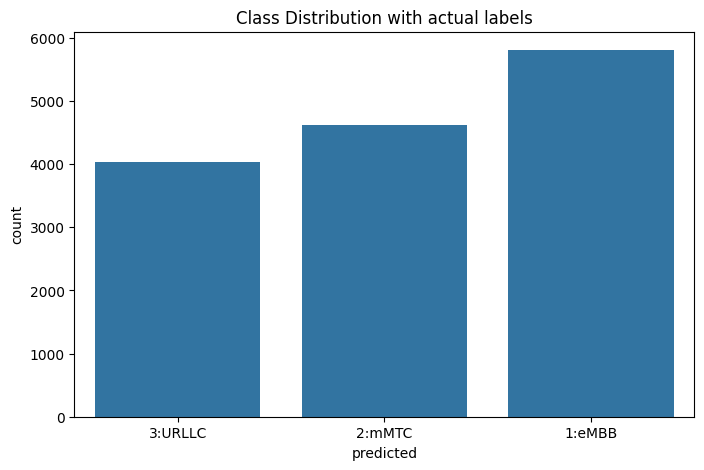

In [6]:
# Class Distribution Analysis before cleaning
plt.figure(figsize=(8, 5))
sns.countplot(x=data['predicted'])
plt.title('Class Distribution with actual labels')
plt.show()

## **Data Cleaning**

In [7]:
# Function to check if a value can be converted to a numeric value
def is_numeric(value):
    try:
        pd.to_numeric(value)
        return True
    except ValueError:
        return False

# Check for non-numeric values in each column
non_numeric_columns = []
for column in data.columns:
    if not all(data[column].apply(is_numeric)):
        non_numeric_columns.append(column)

# Print columns with non-numeric values
if non_numeric_columns:
    print("Columns with non-numeric values:", non_numeric_columns)
else:
    print("All columns contain numeric values.")

Columns with non-numeric values: ['Proto', 'sDSb', 'dDSb', 'Cause', 'State', 'predicted', 'Label']


In [8]:
data = data.drop(columns=['Proto', 'sDSb', 'dDSb', 'Cause', 'State', 'Label'])
data

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,DstWin,sVid,dVid,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,predicted
0,34555.000000,982.000000,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,224.0,184.0,...,NaN,610.0,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.443790e+05,3:URLLC
1,531568.000000,11362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,...,NaN,610.0,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.816910e+05,3:URLLC
2,360399.000000,70834.000000,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.755800e+05,3:URLLC
3,30702.000000,440.000000,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.202390e+05,3:URLLC
4,312747.000000,128397.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,3.486120e+05,3:URLLC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,455292.377185,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,0.0,0.0,...,64896.0,NaN,NaN,1.202037e+09,148517648.0,0.595314,0.723920,0.032170,2.373585e+06,2:mMTC
14452,455262.025767,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,0.0,0.0,...,64896.0,NaN,NaN,1.202037e+09,148517648.0,0.652207,0.874332,0.028468,2.367298e+06,2:mMTC
14453,455286.246951,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,0.0,0.0,...,64896.0,NaN,NaN,1.202037e+09,148517648.0,0.876566,0.250007,0.041358,2.383580e+06,2:mMTC
14454,455211.102576,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,0.0,0.0,...,64896.0,NaN,NaN,1.202037e+09,148517648.0,0.547553,0.645027,0.027258,2.384146e+06,2:mMTC


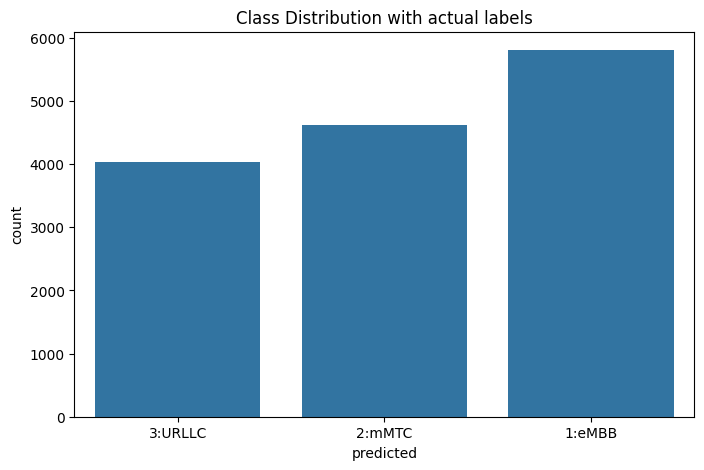

In [9]:
# Class Distribution Analysis after removing non-numeric columns
plt.figure(figsize=(8, 5))
sns.countplot(x=data['predicted'])
plt.title('Class Distribution with actual labels')
plt.show()

In [10]:
# Check for missing values (NaN)
missing_values = data.isna().sum()

# Print missing values count for each column
print(missing_values)

X                 0
Seq               0
Dur               0
RunTime           0
Mean              0
Sum               0
Min               0
Max               0
sTos              1
dTos           3887
sTtl              1
dTtl           3923
sHops             1
dHops          3899
TotPkts           0
SrcPkts           0
DstPkts           0
TotBytes          0
SrcBytes          0
DstBytes          0
Offset            0
sMeanPktSz        0
dMeanPktSz        0
Load              0
SrcLoad           0
DstLoad           0
Loss              0
SrcLoss           0
DstLoss           0
pLoss             0
SrcGap         3113
DstGap         3113
Rate              0
SrcRate           0
DstRate           0
SrcWin         3230
DstWin         4243
sVid          14082
dVid          14452
SrcTCPBase     3113
DstTCPBase     4384
TcpRtt            0
SynAck            0
AckDat            0
UniqueID          0
predicted         0
dtype: int64


In [11]:
data = data.drop(columns=['sVid', 'dVid'])
data

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,predicted
0,34555.000000,982.000000,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,224.0,184.0,...,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.443790e+05,3:URLLC
1,531568.000000,11362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,...,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.816910e+05,3:URLLC
2,360399.000000,70834.000000,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,0.0,NaN,...,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.755800e+05,3:URLLC
3,30702.000000,440.000000,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,0.0,0.0,...,43.465034,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.202390e+05,3:URLLC
4,312747.000000,128397.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,...,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,3.486120e+05,3:URLLC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,455292.377185,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,0.0,0.0,...,1.594339,64256.0,64896.0,1.202037e+09,148517648.0,0.595314,0.723920,0.032170,2.373585e+06,2:mMTC
14452,455262.025767,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,0.0,0.0,...,1.400239,64256.0,64896.0,1.202037e+09,148517648.0,0.652207,0.874332,0.028468,2.367298e+06,2:mMTC
14453,455286.246951,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,0.0,0.0,...,1.626468,64256.0,64896.0,1.202037e+09,148517648.0,0.876566,0.250007,0.041358,2.383580e+06,2:mMTC
14454,455211.102576,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,0.0,0.0,...,1.408035,64256.0,64896.0,1.202037e+09,148517648.0,0.547553,0.645027,0.027258,2.384146e+06,2:mMTC


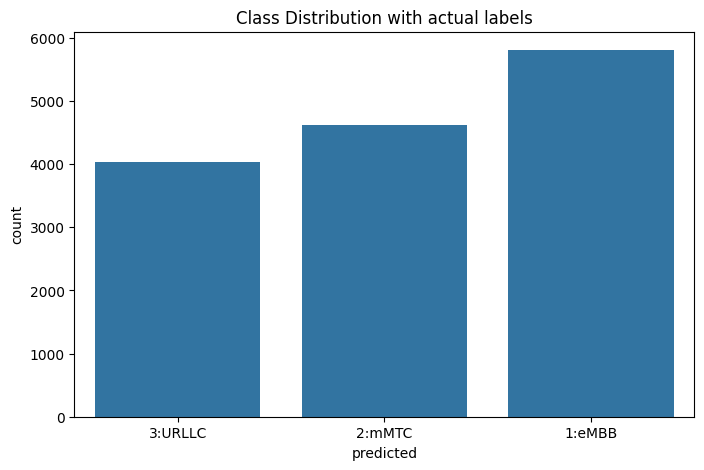

In [12]:
# Class Distribution Analysis after removing empty columns
plt.figure(figsize=(8, 5))
sns.countplot(x=data['predicted'])
plt.title('Class Distribution with actual labels')
plt.show()

In [13]:
# Check for missing values (NaN)
missing_values = data.isna().sum()

# Print missing values count for each column
print(missing_values)

X                0
Seq              0
Dur              0
RunTime          0
Mean             0
Sum              0
Min              0
Max              0
sTos             1
dTos          3887
sTtl             1
dTtl          3923
sHops            1
dHops         3899
TotPkts          0
SrcPkts          0
DstPkts          0
TotBytes         0
SrcBytes         0
DstBytes         0
Offset           0
sMeanPktSz       0
dMeanPktSz       0
Load             0
SrcLoad          0
DstLoad          0
Loss             0
SrcLoss          0
DstLoss          0
pLoss            0
SrcGap        3113
DstGap        3113
Rate             0
SrcRate          0
DstRate          0
SrcWin        3230
DstWin        4243
SrcTCPBase    3113
DstTCPBase    4384
TcpRtt           0
SynAck           0
AckDat           0
UniqueID         0
predicted        0
dtype: int64


In [14]:
# Create a dictionary for columns with missing values
columns_with_missing = {}

# Iterate through the dictionary of missing values
for column, count in missing_values.items():
    columns_with_missing[column] = count

# Print the dictionary
print(columns_with_missing)

{'X': 0, 'Seq': 0, 'Dur': 0, 'RunTime': 0, 'Mean': 0, 'Sum': 0, 'Min': 0, 'Max': 0, 'sTos': 1, 'dTos': 3887, 'sTtl': 1, 'dTtl': 3923, 'sHops': 1, 'dHops': 3899, 'TotPkts': 0, 'SrcPkts': 0, 'DstPkts': 0, 'TotBytes': 0, 'SrcBytes': 0, 'DstBytes': 0, 'Offset': 0, 'sMeanPktSz': 0, 'dMeanPktSz': 0, 'Load': 0, 'SrcLoad': 0, 'DstLoad': 0, 'Loss': 0, 'SrcLoss': 0, 'DstLoss': 0, 'pLoss': 0, 'SrcGap': 3113, 'DstGap': 3113, 'Rate': 0, 'SrcRate': 0, 'DstRate': 0, 'SrcWin': 3230, 'DstWin': 4243, 'SrcTCPBase': 3113, 'DstTCPBase': 4384, 'TcpRtt': 0, 'SynAck': 0, 'AckDat': 0, 'UniqueID': 0, 'predicted': 0}


In [15]:
# Create a dictionary for columns with missing values
filtered_columns_with_missing = {}

# Filter out columns with non-zero missing value counts
for column, count in missing_values.items():
    if count != 0 and count > 10:
      filtered_columns_with_missing[column] = count

# Print the filtered dictionary
print(filtered_columns_with_missing)

{'dTos': 3887, 'dTtl': 3923, 'dHops': 3899, 'SrcGap': 3113, 'DstGap': 3113, 'SrcWin': 3230, 'DstWin': 4243, 'SrcTCPBase': 3113, 'DstTCPBase': 4384}


In [16]:
for column, count in filtered_columns_with_missing.items():
  print(data[column].unique(), "\n\n",data[column].value_counts(dropna=False), "\n\n\n")

[184.  nan   0. 186.  48.  40.] 

 0.0      10552
NaN       3887
186.0       10
184.0        4
40.0         2
48.0         1
Name: dTos, dtype: int64 



[255.  nan 117.  64. 116.  62.  53.  63.  52. 252. 250.  59.  47.  54.] 

 59.0     6924
NaN      3923
117.0    1933
64.0      896
116.0     413
53.0      303
62.0       16
255.0      12
63.0       11
54.0        8
52.0        7
47.0        6
252.0       2
250.0       2
Name: dTtl, dtype: int64 



[ 1. nan 11.  0. 12.  2.  4.  6.  5. 17. 10.] 

 5.0     6564
NaN     3899
11.0    2452
0.0      896
1.0      431
12.0     180
2.0       16
10.0       8
17.0       6
4.0        2
6.0        2
Name: dHops, dtype: int64 



[nan  0.] 

 0.0    11343
NaN     3113
Name: SrcGap, dtype: int64 



[nan  0.] 

 0.0    11343
NaN     3113
Name: DstGap, dtype: int64 



[         nan 1.635000e+03 3.355392e+07 6.809600e+04 9.779200e+04
 1.751000e+03 4.094000e+03 8.294400e+04 3.706880e+06 2.610000e+02
 1.677696e+07 1.800000e+02 1.304064e+06 7.577600e+04

In [17]:
data = data.dropna()
data

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,predicted
40,34393.000000,24.000000,0.133023,0.133023,0.133023,0.133023,0.133023,0.133023,0.0,0.0,...,30.069990,1635.0,879.0,3.278968e+09,4.135953e+09,0.000000,0.000000,0.000000,2.475470e+05,3:URLLC
134,727022.000000,250.000000,0.001092,0.001092,0.001092,0.001092,0.001092,0.001092,0.0,0.0,...,0.000000,68096.0,31104.0,6.108380e+08,1.659091e+09,0.079877,0.041040,0.038837,3.501310e+05,3:URLLC
174,693697.000000,1959.000000,0.014081,0.014081,0.014081,0.014081,0.014081,0.014081,0.0,0.0,...,71.017685,97792.0,31104.0,3.649189e+09,1.482432e+09,0.012972,0.000953,0.012019,1.003190e+05,3:URLLC
237,22844.000000,14.000000,0.132893,0.132893,0.132893,0.132893,0.132893,0.132893,0.0,0.0,...,30.099403,1751.0,947.0,1.882601e+08,4.396569e+08,0.000000,0.000000,0.000000,2.314970e+05,3:URLLC
242,36309.000000,7.000000,3.521330,3.521330,3.521330,3.521330,3.521330,3.521330,0.0,0.0,...,7.099590,4094.0,5549.0,1.094324e+09,3.441728e+09,0.000000,0.000000,0.000000,1.976550e+05,3:URLLC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,455292.377185,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,0.0,0.0,...,1.594339,64256.0,64896.0,1.202037e+09,1.485176e+08,0.595314,0.723920,0.032170,2.373585e+06,2:mMTC
14452,455262.025767,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,0.0,0.0,...,1.400239,64256.0,64896.0,1.202037e+09,1.485176e+08,0.652207,0.874332,0.028468,2.367298e+06,2:mMTC
14453,455286.246951,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,0.0,0.0,...,1.626468,64256.0,64896.0,1.202037e+09,1.485176e+08,0.876566,0.250007,0.041358,2.383580e+06,2:mMTC
14454,455211.102576,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,0.0,0.0,...,1.408035,64256.0,64896.0,1.202037e+09,1.485176e+08,0.547553,0.645027,0.027258,2.384146e+06,2:mMTC


In [18]:
# Check for missing values (NaN)
missing_values = data.isna().sum()

# Print missing values count for each column
print(missing_values)

X             0
Seq           0
Dur           0
RunTime       0
Mean          0
Sum           0
Min           0
Max           0
sTos          0
dTos          0
sTtl          0
dTtl          0
sHops         0
dHops         0
TotPkts       0
SrcPkts       0
DstPkts       0
TotBytes      0
SrcBytes      0
DstBytes      0
Offset        0
sMeanPktSz    0
dMeanPktSz    0
Load          0
SrcLoad       0
DstLoad       0
Loss          0
SrcLoss       0
DstLoss       0
pLoss         0
SrcGap        0
DstGap        0
Rate          0
SrcRate       0
DstRate       0
SrcWin        0
DstWin        0
SrcTCPBase    0
DstTCPBase    0
TcpRtt        0
SynAck        0
AckDat        0
UniqueID      0
predicted     0
dtype: int64


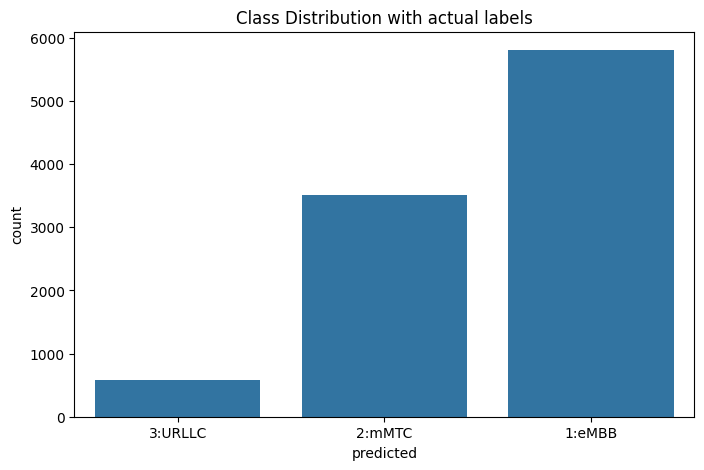

In [19]:
# Class Distribution Analysis after removing empty rows
plt.figure(figsize=(8, 5))
sns.countplot(x=data['predicted'])
plt.title('Class Distribution with actual labels')
plt.show()

## **Class Distribution Analysis After Data Cleaning**

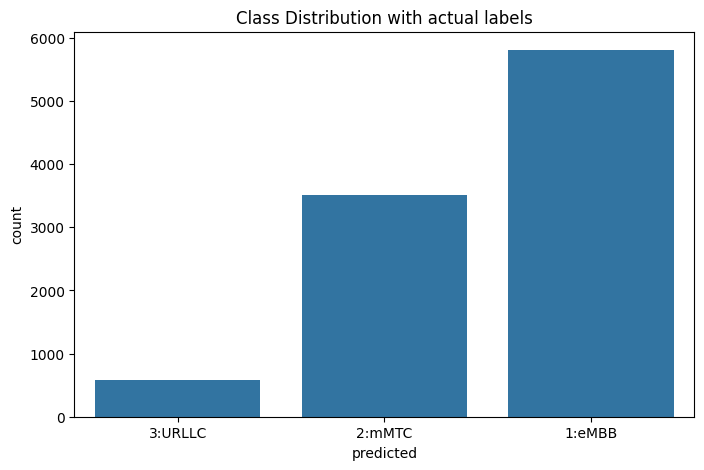

In [21]:
# Class Distribution Analysis after Data Cleaning
plt.figure(figsize=(8, 5))
sns.countplot(x=data['predicted'])
plt.title('Class Distribution with actual labels')
plt.show()

## Heatmaps

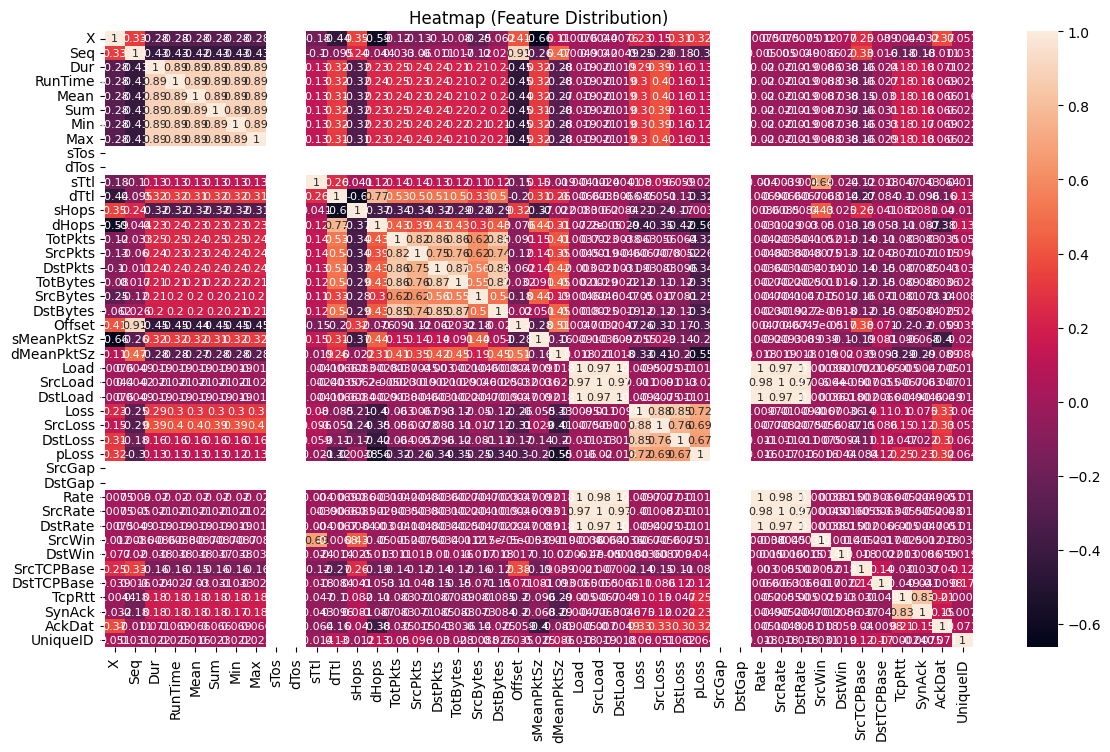

In [22]:
# Create a heatmap for the correlation matrix of all features
# plt.figure(figsize=(14, 8))
sns.heatmap(data.iloc[:, :-1].corr(), annot=True, annot_kws={"size": 8})
plt.title('Heatmap (Feature Distribution)')
plt.show()

# **SYNC NOTEBOOKS**

In [ ]:
%cp '/content/drive/MyDrive/Colab Notebooks/NewDataset.ipynb' '/content/drive/MyDrive/Network_Slicing_with_ML_repo/Network-Slicing-with-ML/Notebooks/'